In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [97]:
df = pd.read_csv(f'D:/Download/iris.csv')
labels = df.iloc[:,4]
filtered_df = df[labels.isin(['setosa', 'versicolor'])]
data = filtered_df.iloc[:,:4]
labels = filtered_df.iloc[:,4]
labels = labels.replace({'setosa': 1, 'versicolor': 0})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16444\3519560053.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels = labels.replace({'setosa': 1, 'versicolor': 0})


In [98]:
# np.c_是 cbind的意思，列合并，第一个合并对象是nrow*1的一列1
data = np.c_[np.ones((len(data), 1)), data]

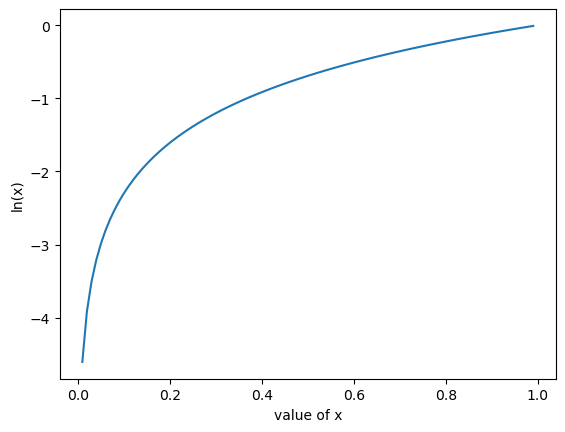

In [99]:
x=np.arange(0.01,1,0.01)
y = np.log(x)
plt.xlabel('value of x')
plt.ylabel('ln(x)')
plt.plot(x,y)

In [100]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def newton(iterations, initial_para, data, labels):
    params = np.array(initial_para,dtype = float)  # [a, b, c, d, e]
    data = np.array(data)
    labels = np.array(labels)
    losses = []
    for _ in range(iterations):
        z = data @ params  
        probabilities = sigmoid(z)
        loss = -np.sum(labels * np.log(probabilities) + (1 - labels) * np.log(1 - probabilities))
        losses.append(loss)
        errors = probabilities - labels  # (N,)
        g_vector = data.T @ errors  # (d,)
        # Hessian 矩阵计算
        W = np.diag(probabilities * (1 - probabilities))  # 对角矩阵 (N, N)
        Hessian = data.T @ W @ data  # (d, d)
        # 参数更新
        params -= np.linalg.inv(Hessian) @ g_vector
    return params,losses


[-1.64452001  2.52917386  3.63652128 -5.86795476 -9.36948148]


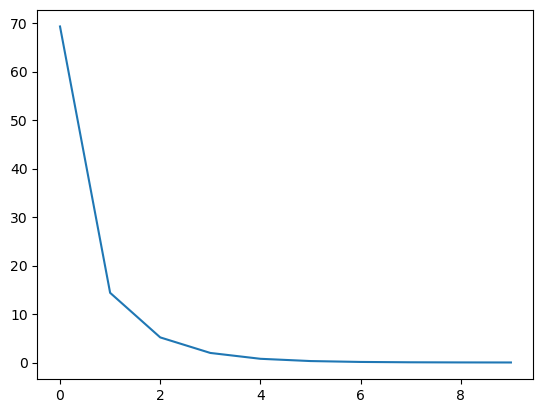

In [ ]:
initial_para = [0, 0, 0, 0, 0]
params,loss = newton(iterations=10, initial_para=initial_para, data=data, labels=labels)
plt.plot(loss)


In [108]:
class logistic_mdel:
    def __init__(self,parameters):
        self.parameters = np.array(parameters)
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def predict_proba(self,X):
        z = X@self.parameters
        return self.sigmoid(z)
    def predict(self,X,threshold = 0.5):
        probabilities = self.predict_proba(X)
        return (probabilities>=threshold).astype(int)
    
model = logistic_mdel(parameters=params)
proba = model.predict(data)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [109]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(labels, proba)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[50  0]
 [ 0 50]]
